In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/zmienne_final.csv').drop(columns=['Unnamed: 0'])


In [0]:
from sklearn.metrics import precision_recall_curve
def plotAP(results):

	fig, ax = plt.subplots(figsize=(10,9))

	for true, pred, label in results:
		precision, recall, thresholds = precision_recall_curve(true, pred)
		average_precision = average_precision_score(true, pred)
		average_precision = round(average_precision, 4)
		lw=2
		ax.plot(recall, precision, lw=lw, label=f'{label}: {average_precision}')
  
	ax.set_xlim([0, 1])
	ax.set_ylim([0.0, 1.01])
	ax.set_xlabel('Recall')
	ax.set_ylabel('Precision')
	ax.set_title(f'Precision Recall Curve ')
	ax.legend(loc="lower right")
	plt.show()

In [0]:
target = 'isFraud'

In [0]:
with open("/content/drive/My Drive/modele/model_NN_1.p", "rb") as fp:
    modelNN = pickle.load(fp)
with open("/content/drive/My Drive/modele/model_XGB_1.p", "rb") as fp:
    modelXGB = pickle.load(fp)
with open("/content/drive/My Drive/modele/model_RF_1.p", "rb") as fp:
    modelRF = pickle.load(fp)

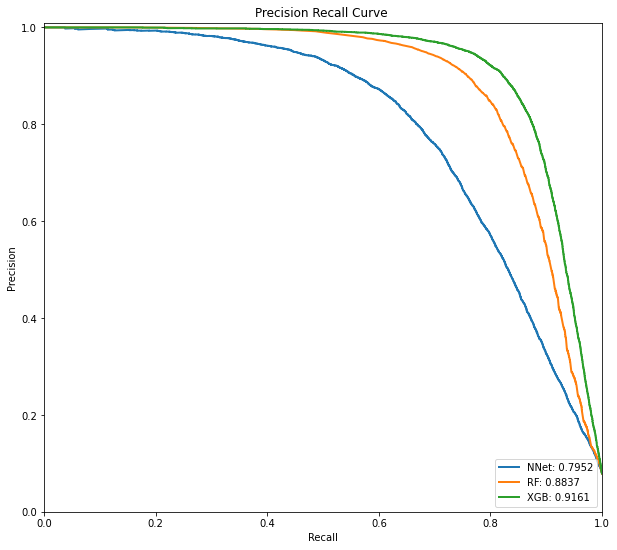

In [16]:
res2plot = []
true = (df[target]==1).astype(int).sort_index()
pred = pd.Series(sum(modelNN["predictions"], []), index=sum(modelNN["indices"], [])).sort_index()
pred2 = pd.Series(sum(modelRF["predictions"], []), index=sum(modelRF["indices"], [])).sort_index()
pred3 = pd.Series(sum(modelXGB["predictions"], []), index=sum(modelXGB["indices"], [])).sort_index()

res2plot.append((true, pred, modelNN["name"]))
res2plot.append((true, pred2, modelRF["name"]))
res2plot.append((true, pred3, modelXGB["name"]))

plotAP(res2plot)
